In [1]:
# import libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
#import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt

In [2]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [3]:
# import data
data_2018 = pd.read_csv('Data_2018_added_ZIP.csv')

In [4]:
data_2018.head()

,OccupancyDateTime,PaidOccupancy,BlockfaceName,SideOfStreet,SourceElementKey,ParkingTimeLimitCategory,ParkingSpaceCount,PaidParkingArea,PaidParkingSubArea,PaidParkingRate,...,DayInMonth,Weekday,HourIn24HourClock,MinutesInHour,Longitude,Latitude,ParkingAvailability,AdjustedParkingAvailability,geometry,ZIP
0,04/20/2018 12:59:00 PM,2,MERCER ST BETWEEN PONTIUS AVE N AND YALE AVE N,S,11786,120.0,7,South Lake Union,South,NaN,...,20,Friday,12,59,-122.331086,47.624219,5,5,POINT (-122.33108562 47.6242189),98109
1,04/20/2018 12:59:00 PM,0,9TH AVE BETWEEN JEFFERSON ST AND JAMES ST,SW,8601,120.0,2,First Hill,NaN,NaN,...,20,Friday,12,59,-122.324500,47.605151,2,2,POINT (-122.32449968 47.60515148),98104
2,04/20/2018 12:59:00 PM,6,S MAIN ST BETWEEN 6TH AVE S AND MAYNARD AVE S,N,88773,120.0,12,Chinatown/ID,Edge,NaN,...,20,Friday,12,59,-122.325666,47.600108,6,6,POINT (-122.32566607 47.60010775),98104
3,04/20/2018 12:59:00 PM,0,COLUMBIA ST BETWEEN BOREN AVE AND MINOR AVE,SE,32558,120.0,8,First Hill,NaN,NaN,...,20,Friday,12,59,-122.323201,47.608111,8,8,POINT (-122.32320088 47.60811139),98104
4,04/20/2018 12:59:00 PM,8,NW 56TH ST BETWEEN 20TH AVE NW AND 22ND AVE NW,N,18621,240.0,11,Ballard,Edge,NaN,...,20,Friday,12,59,-122.383426,47.669513,3,3,POINT (-122.38342615 47.66951344),98107


In [5]:
# create a dataframe from parking availability and weekday columns
data_availability_weekday = data_2018[['AdjustedParkingAvailability', 'Weekday']]

In [6]:
data_availability_weekday.head()

,AdjustedParkingAvailability,Weekday
0,5,Friday
1,2,Friday
2,6,Friday
3,8,Friday
4,3,Friday


In [7]:
# check summary statistics
data_availability_weekday.describe()

,AdjustedParkingAvailability
count,2.567124e+07
mean,4.236369e+00
std,3.802064e+00
min,0.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,6.000000e+00
max,4.000000e+01


null hypothesis: There is no difference in means of parking availability between days of the week (excluded Sunday).

alternative hypothesis: There is difference between means of parking availability between days of the week (excluded Sunday).

In [8]:
# ANOVA using scipy.stats
stats.f_oneway(data_2018['AdjustedParkingAvailability'][data_2018['Weekday'] == 'Monday'], 
               data_2018['AdjustedParkingAvailability'][data_2018['Weekday'] == 'Tuesday'],
               data_2018['AdjustedParkingAvailability'][data_2018['Weekday'] == 'Wednesday'],
               data_2018['AdjustedParkingAvailability'][data_2018['Weekday'] == 'Thursday'], 
               data_2018['AdjustedParkingAvailability'][data_2018['Weekday'] == 'Friday'],
               data_2018['AdjustedParkingAvailability'][data_2018['Weekday'] == 'Saturday'])

F_onewayResult(statistic=6680.7207931521925, pvalue=0.0)

The p-value = 0.0 indicates there is significant effect of day of the week on the parking availability.

In [9]:
# ANOVA using statsmodels (regression formula)
results = ols('AdjustedParkingAvailability ~ C(Weekday)', data=data_availability_weekday).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     AdjustedParkingAvailability   R-squared:                       0.001
Model:                                     OLS   Adj. R-squared:                  0.001
Method:                          Least Squares   F-statistic:                     6681.
Date:                         Tue, 13 Aug 2019   Prob (F-statistic):               0.00
Time:                                 21:03:40   Log-Likelihood:            -7.0694e+07
No. Observations:                     25671236   AIC:                         1.414e+08
Df Residuals:                         25671230   BIC:                         1.414e+08
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.0933      0.002   2347.677      0.000       4.090       4.097
C(Weekday)[T.Monday]        0.4074      0.003    155.652      0.000       0.402       0.412
C(Weekday)[T.Saturday]     -0.0159      0.003     -6.083      0.000      -0.021      -0.011
C(Weekday)[T.Thursday]      0.1260      0.002     51.086      0.000       0.121       0.131
C(Weekday)[T.Tuesday]       0.2153      0.003     82.250      0.000       0.210       0.220
C(Weekday)[T.Wednesday]     0.1635      0.002     66.294      0.000       0.159       0.168
==============================================================================
Omnibus:                 11822290.675   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         90642725.158
Skew:                           2.069   Prob(JB):                         0.00
Kurtosis:                      11.223   Cond. No.                         6.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model is significiant, F(5,25671230)= 6681, p = 0.00. Based on the p-value we can say there is a significant difference in the group means.
The coefficients (column 'coef'), are the difference in mean between the control group (Friday) and the respective group listed. 
The Intercept represents the mean for the group with Friday as a day of the week. The intercept is the control (base) group in the model.  
Looking at the p-values (P>|t|), we can see the difference between the Friday group and any other group (Monday, Tuesday, Wednesday, Thursday or Saturday) is significant, p = 0.000. 


In [10]:
# getting ANOVA table
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Weekday),4.822448e+05,5.0,6680.720793,0.0
Residual,3.706132e+08,25671230.0,NaN,NaN


The Weekday row is the between groups effect which is the overall experimental effect. 
The sum of squares for the model (sum_sq = 4.822448e+05) is how much variance is explained by the model. 
The current model explains a significant amount of variance, F(5,25671230)= 6681, p < 0.05. 
The Residual row is the unexplained variance or the unsystematic variation in the data (sum_sq = 3.706132e+08). 
In this case, the unsystematic variation represents the individual differences in parking availability and different reactions to a day of the week.

### Calculating Model Effect Size
The effect size tells us how much of an impact the experiment will have in the real world. 

In [11]:
# extract sum_sq column values from ANOVA table
aov_table.sum_sq[0], aov_table.sum_sq[1]

(482244.7715768432, 370613196.69973636)

In [12]:
# calculating eta squared - R2
# formula: R2 and eta squared = SS_m/SS_r
R2_and_eta_squared = aov_table.sum_sq[0]/(aov_table.sum_sq[0]+aov_table.sum_sq[1])
print('The current model accounts for '+ str(round(R2_and_eta_squared,4)*100) + '% of the variance in contributing to parking availability.')

The current model accounts for 0.13% of the variance in contributing to parking availability.


In [13]:
# calculate the mean squares
# formulas: 
# MS_m = SS_m/df_m, MS_r = SS_r/df_r
MS_m = aov_table.sum_sq[0]/aov_table.df[0]
MS_r = aov_table.sum_sq[1]/aov_table.df[1]
print(MS_m, 'is the average amount of variance explained by the current model.') 
print(MS_r, 'is the average amount of variance unexplained by the current model.')

96448.95431536864 is the average amount of variance explained by the current model.
14.436908426270824 is the average amount of variance unexplained by the current model.


In [14]:
# the function to calculate the effect sizes, the mean squares and then updates the table
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Weekday),4.822448e+05,5.0,96448.954315,6680.720793,0.0,0.0013,0.001299
Residual,3.706132e+08,25671230.0,14.436908,NaN,NaN,NaN,NaN


From the anova_table we get the same values for the average amounts (mean_sq) as calculated above (MS_m and MS_r).

### Ways to check assumptions


##### Assumption: Homogeneity of Variance


In [15]:
# use the Levene’s test to test for equal variances between groups
stats.levene(data_2018['AdjustedParkingAvailability'][data_2018['Weekday'] == 'Monday'], 
             data_2018['AdjustedParkingAvailability'][data_2018['Weekday'] == 'Tuesday'],
             data_2018['AdjustedParkingAvailability'][data_2018['Weekday'] == 'Wednesday'],
             data_2018['AdjustedParkingAvailability'][data_2018['Weekday'] == 'Thursday'], 
             data_2018['AdjustedParkingAvailability'][data_2018['Weekday'] == 'Friday'],
             data_2018['AdjustedParkingAvailability'][data_2018['Weekday'] == 'Saturday'])

LeveneResult(statistic=1079.103874847839, pvalue=0.0)

Levene’s test for homogeneity of variance is significant which indicates that the groups don't have equal variances.

##### Assumption: Normality


In [16]:
# using Shapiro method to test for normality
stats.shapiro(results.resid)

/anaconda3/envs/statenv/lib/python3.6/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8221884965896606, 0.0)

The results from the Shapiro-Wilk test is statistically significant which indicates that the residuals aren't normally distributed.

In [56]:
# prediction values
pred_val_t = results.fittedvalues.copy()

In [57]:
# data values
true_val_t = data_availability_weekday['AdjustedParkingAvailability'].values.copy()

In [58]:
# calculating residuals, which presents prediction errors
residual_t = true_val_t - pred_val_t

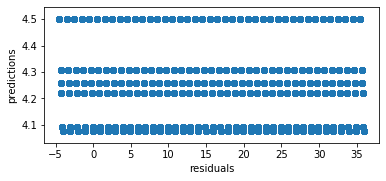

In [60]:
# plotting residuals vs. predictions
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual_t, pred_val_t)
_ = plt.xlabel('residuals')
_ = plt.ylabel('predictions')
plt.show()

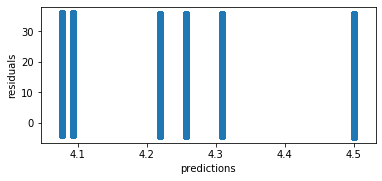

In [69]:
# plotting residuals vs. predictions
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(pred_val_t, residual_t)
_ = plt.ylabel('residuals')
_ = plt.xlabel('predictions')
plt.show()

From the above two graphs we can see that predictions have 6 different values and residuals have values from -5 to 36. Which means, anytime the model predicted there were 4.5 parking spots available, it made prediction error anywhere from -5 up to 36 parking spots. And everytime the residual value was zero it means it made correct prediction (there was no prediction error) regarding the number of available parking spots.

0.8486243342301315

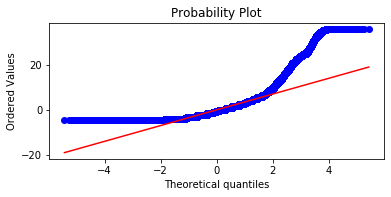

In [55]:
# apply normal probability plot to assess how the residuals depart from normality visually
# r is the square root of the coefficient of determination
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = stats.probplot(residual_t, plot=ax, fit=True)
r**2

Above is probability plot of the residuals against the quantiles of the normal distribution. Blue are plotted residuals values and red represents best-fit line for the residuals. Since all values aren't in a straight, diagonal line (on the red line are just between -2 and 2), the above plot confirms that residuals aren't normally distributed.

### Post-hoc Testing

#### Tukey’s HSD Post-hoc comparison

In [17]:
# Tukey HSD post-hoc comparison test between different group means
mc = MultiComparison(data_availability_weekday['AdjustedParkingAvailability'], data_availability_weekday['Weekday'])
mc_results = mc.tukeyhsd()
print(mc_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj  lower   upper  reject
--------------------------------------------------------
  Friday    Monday   0.4074 0.001  0.3999  0.4148   True
  Friday  Saturday  -0.0159 0.001 -0.0233 -0.0084   True
  Friday  Thursday    0.126 0.001  0.1189   0.133   True
  Friday   Tuesday   0.2153 0.001  0.2079  0.2228   True
  Friday Wednesday   0.1635 0.001  0.1564  0.1705   True
  Monday  Saturday  -0.4232 0.001  -0.431 -0.4154   True
  Monday  Thursday  -0.2814 0.001 -0.2889 -0.2739   True
  Monday   Tuesday   -0.192 0.001 -0.1999 -0.1842   True
  Monday Wednesday  -0.2439 0.001 -0.2513 -0.2364   True
Saturday  Thursday   0.1418 0.001  0.1344  0.1492   True
Saturday   Tuesday   0.2312 0.001  0.2233   0.239   True
Saturday Wednesday   0.1793 0.001  0.1719  0.1868   True
Thursday   Tuesday   0.0894 0.001  0.0819  0.0968   True
Thursday Wednesday   0.0375 0.001  0.0305  0.0445   True
 Tuesday Wednesday  -0.0519 0.0

The Tukey HSD post-hoc comparison test controls for type I error and maintains the familywise error rate at 0.05 (FWER= 0.05 top of the table). 
The group1 and group2 columns are the groups being compared. The meandiff column is the difference in means of the two groups (group2 – group1). 
The lower/upper columns are the lower/upper boundaries of the 95% confidence interval. The reject column tells us that we should reject the null hypothesis. 

#### Bonferroni Correction Post-hoc Comparison

In [18]:
# first the corrected p-value needs to be calculated
# this can be done using the formula:

# p-value/number of comparisons = 0.05/15 = 0.00333

The following t-tests that are conducted have to have a p-value less than 0.00333 in order to be considered significant.

In [19]:
stats.ttest_ind(data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Friday'], data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Monday'])

Ttest_indResult(statistic=-156.41844923644769, pvalue=0.0)

In [20]:
stats.ttest_ind(data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Friday'], data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Saturday'])

Ttest_indResult(statistic=6.046515847499594, pvalue=1.4801774453020783e-09)

In [21]:
stats.ttest_ind(data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Friday'], data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Thursday'])

Ttest_indResult(statistic=-51.848628790778726, pvalue=0.0)

In [22]:
stats.ttest_ind(data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Friday'], data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Wednesday'])

Ttest_indResult(statistic=-67.0941737837553, pvalue=0.0)

In [23]:
stats.ttest_ind(data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Friday'], data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Tuesday'])

Ttest_indResult(statistic=-83.27436720146751, pvalue=0.0)

In [24]:
stats.ttest_ind(data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Monday'], data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Saturday'])

Ttest_indResult(statistic=150.35364855108426, pvalue=0.0)

In [25]:
stats.ttest_ind(data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Monday'], data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Thursday'])

Ttest_indResult(statistic=107.62520818465997, pvalue=0.0)

In [26]:
stats.ttest_ind(data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Monday'], data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Wednesday'])

Ttest_indResult(statistic=92.98182417278841, pvalue=0.0)

In [27]:
stats.ttest_ind(data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Monday'], data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Tuesday'])

Ttest_indResult(statistic=69.30408294219237, pvalue=0.0)

In [28]:
stats.ttest_ind(data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Saturday'], data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Thursday'])

Ttest_indResult(statistic=-53.88250440620397, pvalue=0.0)

In [29]:
stats.ttest_ind(data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Saturday'], data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Wednesday'])

Ttest_indResult(statistic=-67.92793047150971, pvalue=0.0)

In [30]:
stats.ttest_ind(data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Saturday'], data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Tuesday'])

Ttest_indResult(statistic=-82.75586706723547, pvalue=0.0)

In [31]:
stats.ttest_ind(data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Thursday'], data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Tuesday'])

Ttest_indResult(statistic=-34.42425583762316, pvalue=1.1395610124274872e-259)

In [32]:
stats.ttest_ind(data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Thursday'], data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Wednesday'])

Ttest_indResult(statistic=-15.342575048013279, pvalue=3.9770848328783924e-53)

In [33]:
stats.ttest_ind(data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Tuesday'], data_availability_weekday['AdjustedParkingAvailability'][data_availability_weekday['Weekday'] == 'Wednesday'])

Ttest_indResult(statistic=19.909835833956997, pvalue=3.3595968363383625e-88)

Using the Bonferroni correction, all the differences between groups are significantly different. 